### Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
"If it does not work use code below while running this notebook in this dir."
import sys
import os
py_file_location = "/content/drive/MyDrive/Colab Notebooks"
sys.path.append(os.path.abspath(py_file_location))

from mytorch import Tensor
from mytorch import activation as active_func
from mytorch import loss as loss_func
from mytorch import optimizer as optim
from mytorch import layer as nn

import numpy as np
import matplotlib.pyplot as plt

### Simple Network
here you have to define a simple linear layer to find coefficients of x_i in below problem. <br>
y = ax_1 + bx_2 + cx_3 <br><br>
![simple network.drawio.png](<attachment:simple network.drawio.png>)
<br><br>
weights of this linear layer is your answer.

### Generate Data

In [5]:
"TODO: set coefficients"
a = 2.0
b = 3.0
c = 4.0

X = Tensor(np.random.randn(100, 3))
coef = Tensor(np.array([[a], [b], [c]]))
y = X @ coef + 5


### Train Network

In [24]:
l = nn.Linear(3, 1, need_bias=True)

"TODO: define an optimizer"
optimizer = optim.SGD([l],learning_rate=0.01)

"TODO: print weight and bias of linear layer"
print("initial W and bias:")
print(l.weight)
print(l.bias)

batch_size = 20
epLoss = []

for epoch in range(100):

    epoch_loss = 0.0

    for start in range(0, 100, batch_size):
        end = start + batch_size

        inputs = X[start:end]

        # TODO: predicted
        predicted = l(inputs)
        actual = y[start:end]
        actual.data = actual.data.reshape(batch_size, 1)

        # TODO: calculate MSE loss
        loss = loss_func.MeanSquaredError(actual, predicted)
        # print(loss)

        # TODO: backward
        optimizer.zero_grad()
        # grad = np.ones(loss.shape)
        grad = Tensor(np.ones(loss.data.shape))
        # print(grad)
        loss.backward(grad)
        # print("Gradients:")
        # print("Weight gradient:", l.weight.grad.data)
        # print("Bias gradient:", l.bias.grad.data)

        # TODO: add loss to epoch_loss
        epoch_loss += loss.data.sum()

        # TODO: update w and b using optimizer
        optimizer.step()

    epLoss.append(epoch_loss)


initial W and bias:
Tensor([[0.4727573 ]
 [0.30117259]
 [0.69399012]], requires_grad=True)
Tensor([[0.]], requires_grad=True)


### Evaluate

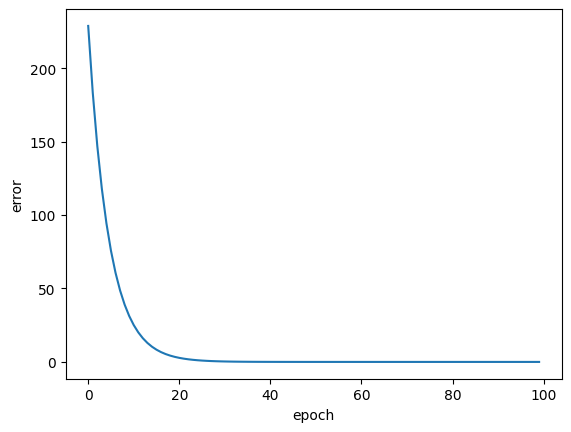


OUT W and bias:
Tensor([[1.99997398]
 [2.99994674]
 [3.9999988 ]], requires_grad=True)
Tensor([[4.99988365]], requires_grad=True)


In [25]:
plt.plot(epLoss, label='Error')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show();

print("\nOUT W and bias:")
print(l.weight)
print(l.bias)